# Exercise 2.1 – Unsupervised Learning Algorithms

## 📘 Notebook 1: Hierarchical Clustering with Full Weather Dataset

**Objective:**  
Apply unsupervised learning to explore associations in weather data using hierarchical clustering techniques.

**Tasks:**
- Load and filter the weather data (by year or decade).
- Standardize the dataset using `StandardScaler`.
- Generate dendrograms using four linkage methods: `single`, `complete`, `average`, and `ward`.
- Analyze the number and nature of clusters formed.
- Compare preliminary results to the "pleasant weather" database (optional for insights).

---

**Dataset Used:**  
- `Dataset-weather-prediction-dataset-processed.csv`



#  Table of Contents

# 📑 Table of Contents

1. [Import Libraries](#1)
2. [Load and Preview Dataset](#2)
3. [Filter Data by Decade](#3)
4. [Preprocess and Scale Data](#4)
5. [Hierarchical Clustering - Dendrograms](#5)  
    5.1 [Single Linkage](#5.1)  
    5.2 [Complete Linkage](#5.2)  
    5.3 [Average Linkage](#5.3)  
    5.4 [Ward Linkage](#5.4)  
6. [Cluster Comparison and Observations](#6)
7. [Conclusion](#7)


 # 1. Import Libraries 

In [2]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler

# Clustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Utility
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries imported successfully.")


✅ All libraries imported successfully.


# 2. Load and Preview Dataset

### We load the original weather dataset and display its shape and first few rows.

In [3]:
# Load the original weather dataset
df_weather = pd.read_csv("Dataset-weather-prediction-dataset-processed.csv")

# Display shape and preview
print(f"✅ Dataset shape: {df_weather.shape}")
df_weather.head()


✅ Dataset shape: (22950, 170)


,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


In [5]:
# Check column names to confirm 'date' exists
print(df_weather.columns)

# Peek at a few rows to inspect date-related info
df_weather.head()


Index(['DATE', 'MONTH', 'BASEL_cloud_cover', 'BASEL_wind_speed',
       'BASEL_humidity', 'BASEL_pressure', 'BASEL_global_radiation',
       'BASEL_precipitation', 'BASEL_snow_depth', 'BASEL_sunshine',
       ...
       'VALENTIA_cloud_cover', 'VALENTIA_humidity', 'VALENTIA_pressure',
       'VALENTIA_global_radiation', 'VALENTIA_precipitation',
       'VALENTIA_snow_depth', 'VALENTIA_sunshine', 'VALENTIA_temp_mean',
       'VALENTIA_temp_min', 'VALENTIA_temp_max'],
      dtype='object', length=170)


,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,19600101,1,7,2.1,0.85,1.018,0.32,0.09,0,0.7,...,5,0.88,1.0003,0.45,0.34,0,4.7,8.5,6.0,10.9
1,19600102,1,6,2.1,0.84,1.018,0.36,1.05,0,1.1,...,7,0.91,1.0007,0.25,0.84,0,0.7,8.9,5.6,12.1
2,19600103,1,8,2.1,0.90,1.018,0.18,0.30,0,0.0,...,7,0.91,1.0096,0.17,0.08,0,0.1,10.5,8.1,12.9
3,19600104,1,3,2.1,0.92,1.018,0.58,0.00,0,4.1,...,7,0.86,1.0184,0.13,0.98,0,0.0,7.4,7.3,10.6
4,19600105,1,6,2.1,0.95,1.018,0.65,0.14,0,5.4,...,3,0.80,1.0328,0.46,0.00,0,5.7,5.7,3.0,8.4


# 3. Filter Data by Decade

### The dataset is filtered to include only entries from the 1980s based on the 'DATE' column.


In [6]:
# Convert 'DATE' column from string/integer to datetime format
df_weather['DATE'] = pd.to_datetime(df_weather['DATE'], format='%Y%m%d', errors='coerce')

# Filter rows where the year is in the 1980s
df_80s = df_weather[df_weather['DATE'].dt.year.between(1980, 1989)]

# Reset index and display basic info
df_80s.reset_index(drop=True, inplace=True)
print(f"✅ Filtered dataset shape (1980s only): {df_80s.shape}")
df_80s.head()


✅ Filtered dataset shape (1980s only): (3653, 170)


,DATE,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,1980-01-01,1,6,2.1,0.83,1.018,0.40,0.01,8,1.6,...,6,0.90,1.0130,0.17,0.05,0,0.0,4.4,2.1,6.0
1,1980-01-02,1,5,2.1,0.84,1.018,0.34,0.09,7,0.9,...,7,0.89,1.0195,0.12,1.48,0,0.0,6.4,1.0,11.5
2,1980-01-03,1,8,2.1,0.80,1.018,0.44,0.07,9,2.0,...,8,0.95,1.0058,0.13,0.60,0,0.0,9.2,6.2,12.2
3,1980-01-04,1,8,2.1,0.94,1.018,0.18,0.43,9,0.0,...,5,0.80,1.0034,0.30,0.50,0,1.5,7.7,5.8,9.2
4,1980-01-05,1,8,2.1,0.90,1.018,0.25,0.26,8,0.2,...,7,0.79,1.0134,0.22,0.03,0,0.1,7.6,6.1,9.5


# 4. Preprocess and Scale Data

### Non-numeric columns are removed, and the remaining features are scaled using StandardScaler to normalize the dataset.


In [7]:
# Make a copy of the 1980s dataset for preprocessing
df_pre_scaled = df_80s.copy()

# Drop non-numeric or non-feature columns
cols_to_drop = ['DATE', 'STATION', 'NAME']
df_pre_scaled = df_pre_scaled.drop(columns=cols_to_drop, errors='ignore')

# Drop rows with missing values (if any) to avoid errors during scaling
df_pre_scaled = df_pre_scaled.dropna()

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = pd.DataFrame(scaler.fit_transform(df_pre_scaled), columns=df_pre_scaled.columns)

# Preview the scaled dataset
df_scaled.head()


,MONTH,BASEL_cloud_cover,BASEL_wind_speed,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_snow_depth,BASEL_sunshine,BASEL_temp_mean,...,VALENTIA_cloud_cover,VALENTIA_humidity,VALENTIA_pressure,VALENTIA_global_radiation,VALENTIA_precipitation,VALENTIA_snow_depth,VALENTIA_sunshine,VALENTIA_temp_mean,VALENTIA_temp_min,VALENTIA_temp_max
0,-1.601193,0.224637,-8.881784e-16,0.682171,-0.01996,-0.959635,-0.443780,2.545028,-0.648373,-1.444209,...,0.055524,0.776252,-0.113499,-1.086828,-0.512422,-0.029917,-0.890217,-1.641922,-1.357732,-1.908024
1,-1.601193,-0.175851,-8.881784e-16,0.780361,-0.01996,-1.027984,-0.273476,2.200184,-0.818385,-1.566772,...,0.606692,0.642797,0.439886,-1.144519,1.460707,-0.029917,-0.890217,-1.110077,-1.624565,-0.496722
2,-1.601193,1.025612,-8.881784e-16,0.387600,-0.01996,-0.914070,-0.316052,2.889872,-0.551223,-1.416973,...,1.157859,1.443527,-0.726480,-1.132981,0.246473,-0.029917,-0.890217,-0.365493,-0.363173,-0.317101
3,-1.601193,1.025612,-8.881784e-16,1.762263,-0.01996,-1.210248,0.450319,2.889872,-1.036971,-1.457827,...,-0.495643,-0.558297,-0.930806,-0.936831,0.108492,-0.029917,-0.473701,-0.764377,-0.460203,-1.086903
4,-1.601193,1.025612,-8.881784e-16,1.369503,-0.01996,-1.130508,0.088422,2.545028,-0.988396,-0.926723,...,0.606692,-0.691752,-0.079445,-1.029137,-0.540018,-0.029917,-0.862449,-0.790969,-0.387430,-1.009922


# 5. Hierarchical Clustering - Dendrograms

### Hierarchical clustering is performed using four linkage methods to examine how the data naturally clusters.


# 5.1 Single Linkage

### The single linkage method is applied to the unscaled dataset due to stability concerns when scaling.


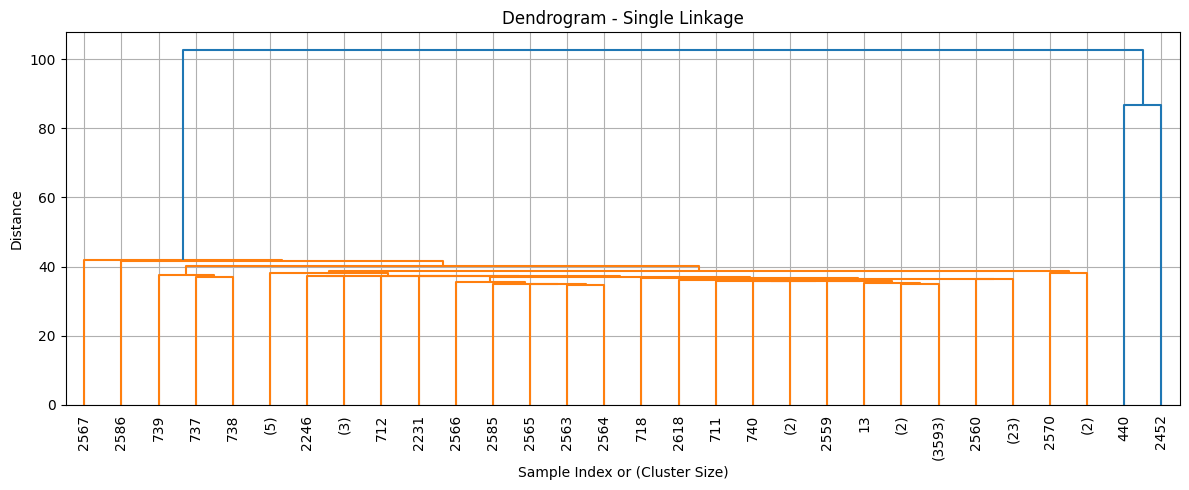

In [9]:
# Use unscaled data to prevent kernel crash with 'single' method
df_unscaled_single = df_pre_scaled.copy()

# Perform linkage using 'single' method
linked_single = linkage(df_unscaled_single, method='single')

# Plot dendrogram
plt.figure(figsize=(12, 5))
dendrogram(linked_single, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title('Dendrogram - Single Linkage')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.grid(True)
plt.tight_layout()
plt.show()


# 5.2 Complete Linkage

### The complete linkage method is applied to the scaled dataset to observe compact cluster formations.


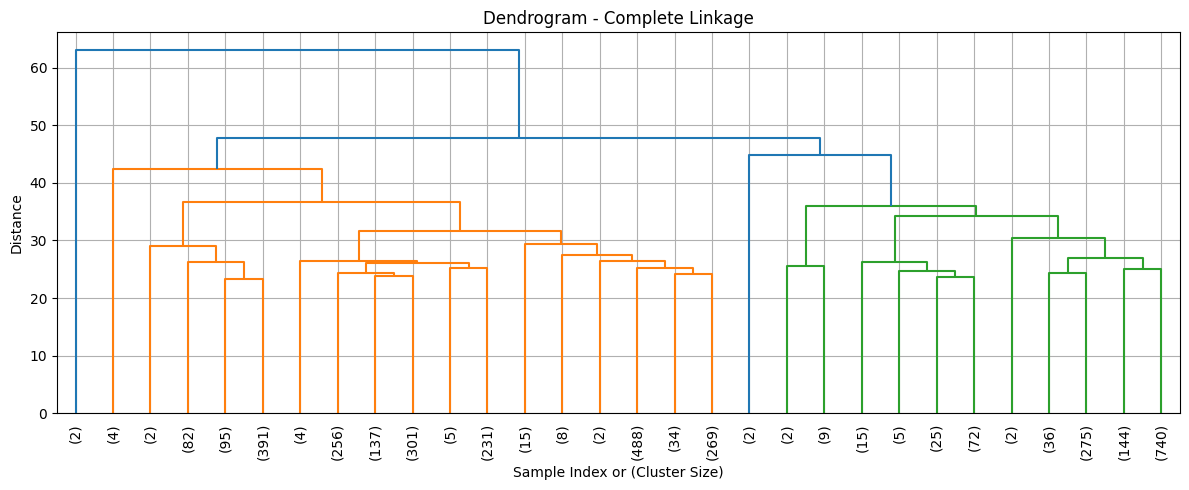

In [10]:
# Perform linkage using 'complete' method
linked_complete = linkage(df_scaled, method='complete')

# Plot dendrogram
plt.figure(figsize=(12, 5))
dendrogram(linked_complete, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title('Dendrogram - Complete Linkage')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.grid(True)
plt.tight_layout()
plt.show()


# 5.3 Average Linkage

### The average linkage method is applied to the scaled dataset to generate clusters based on average pairwise distances.


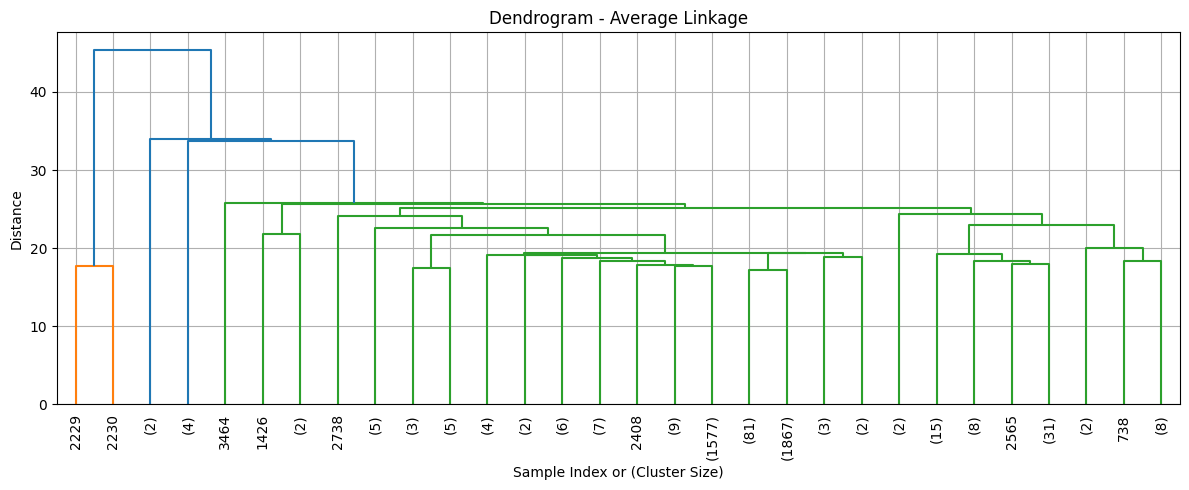

In [11]:
# Perform linkage using 'average' method
linked_average = linkage(df_scaled, method='average')

# Plot dendrogram
plt.figure(figsize=(12, 5))
dendrogram(linked_average, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title('Dendrogram - Average Linkage')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.grid(True)
plt.tight_layout()
plt.show()


# 5.4 Ward Linkage

### The ward linkage method is applied to the scaled dataset to form clusters by minimizing variance within each cluster.


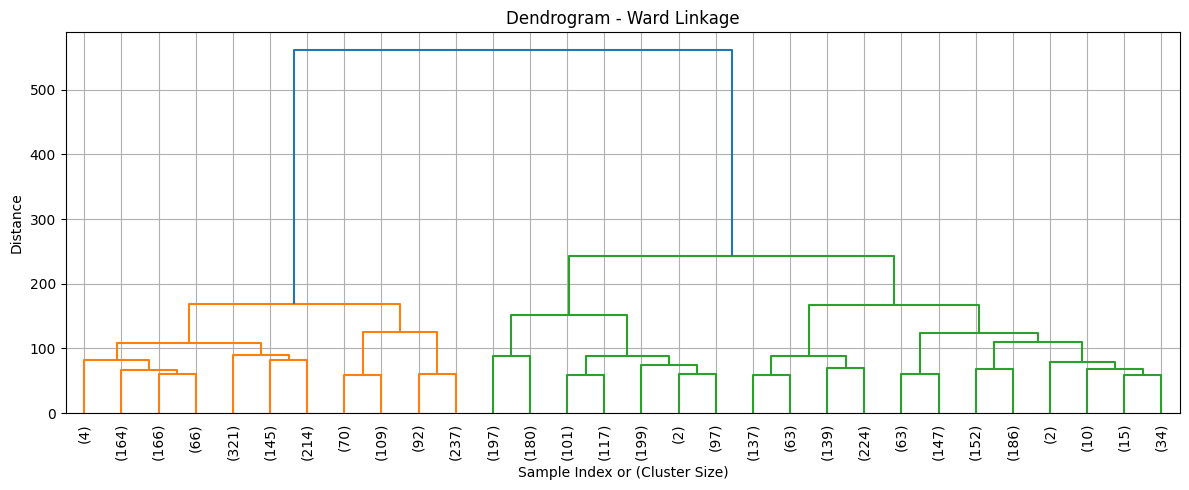

In [12]:
# Perform linkage using 'ward' method
linked_ward = linkage(df_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(12, 5))
dendrogram(linked_ward, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title('Dendrogram - Ward Linkage')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.grid(True)
plt.tight_layout()
plt.show()


##  Example: Save “Single Linkage” Dendrogram

### Dendrogram – Complete Linkage (Scaled Data)

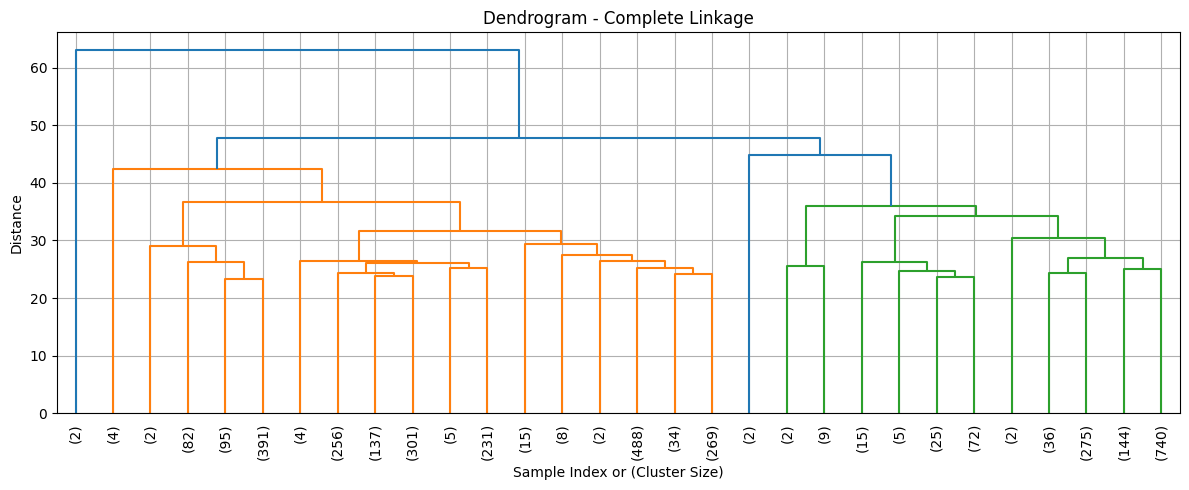

In [18]:
# Perform linkage using 'complete' method
linked_complete = linkage(df_scaled, method='complete')

# Create and save figure
fig = plt.figure(figsize=(12, 5))
dendrogram(linked_complete, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title('Dendrogram - Complete Linkage')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.grid(True)
plt.tight_layout()
fig.savefig("dendrogram_complete.png", dpi=300)
plt.show()


###  Dendrogram – Single Linkage (Unscaled Data)

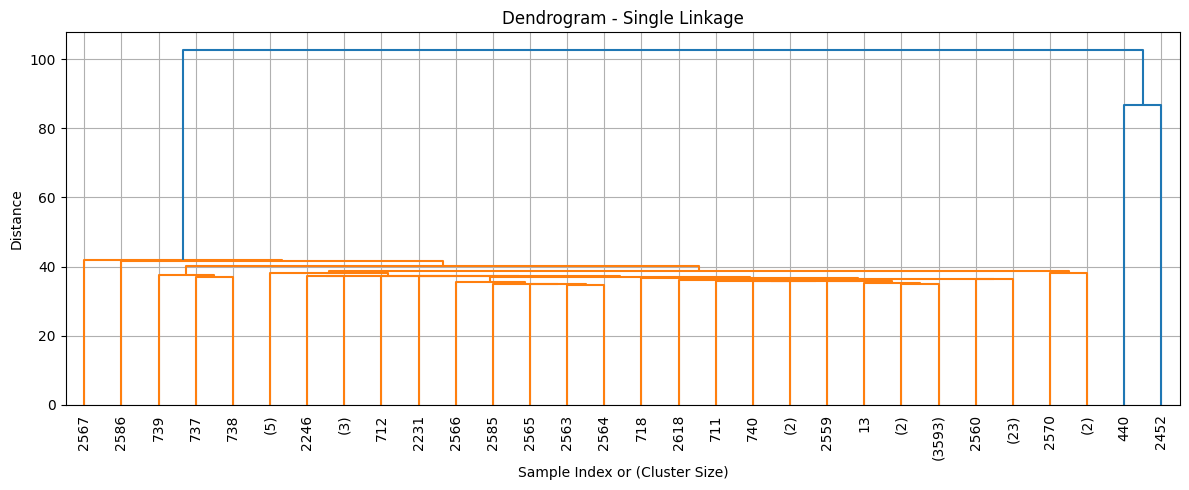

In [22]:
# Perform linkage using 'single' method
linked_single = linkage(df_unscaled_single, method='single')

# Create and save figure
fig = plt.figure(figsize=(12, 5))
dendrogram(linked_single, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title('Dendrogram - Single Linkage')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.grid(True)
plt.tight_layout()
fig.savefig("dendrogram_single.png", dpi=300)
plt.show()


### Dendrogram – Complete Linkage (Scaled Data)

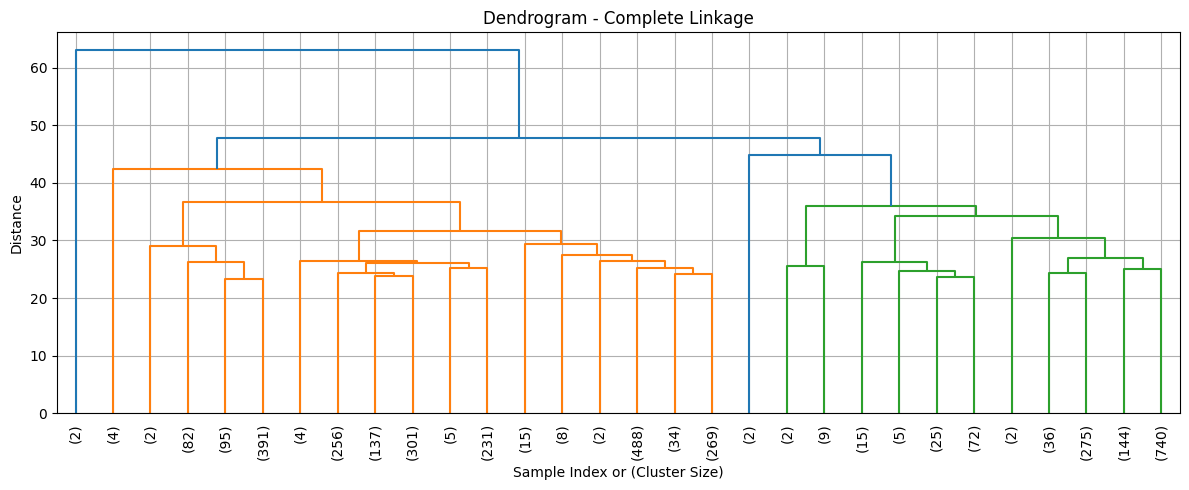

In [19]:
# Perform linkage using 'complete' method
linked_complete = linkage(df_scaled, method='complete')

# Create and save figure
fig = plt.figure(figsize=(12, 5))
dendrogram(linked_complete, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title('Dendrogram - Complete Linkage')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.grid(True)
plt.tight_layout()
fig.savefig("dendrogram_complete.png", dpi=300)
plt.show()


###  Dendrogram – Average Linkage (Scaled Data)

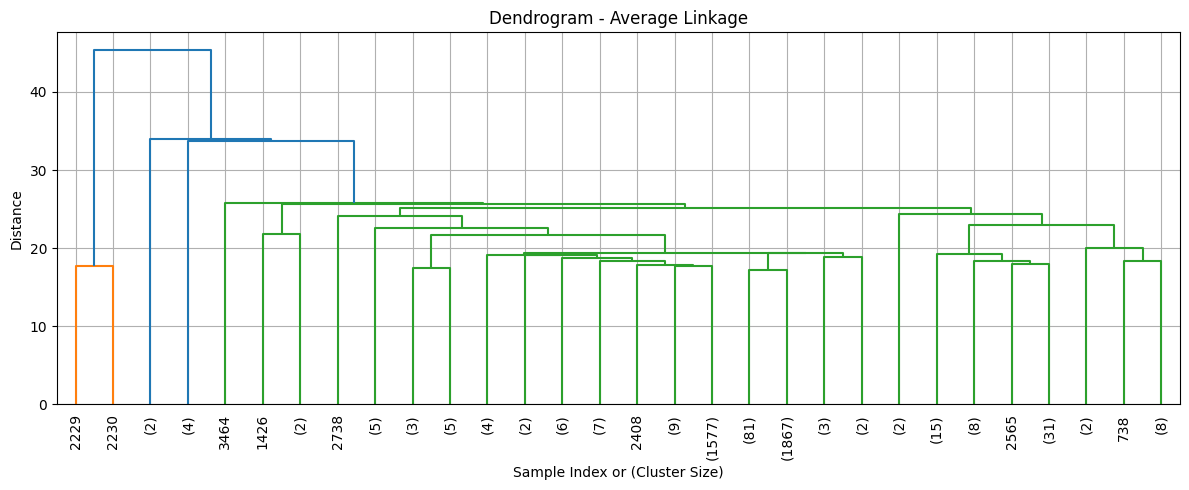

In [20]:
# Perform linkage using 'average' method
linked_average = linkage(df_scaled, method='average')

# Create and save figure
fig = plt.figure(figsize=(12, 5))
dendrogram(linked_average, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title('Dendrogram - Average Linkage')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.grid(True)
plt.tight_layout()
fig.savefig("dendrogram_average.png", dpi=300)
plt.show()


### Dendrogram – Ward Linkage (Scaled Data)

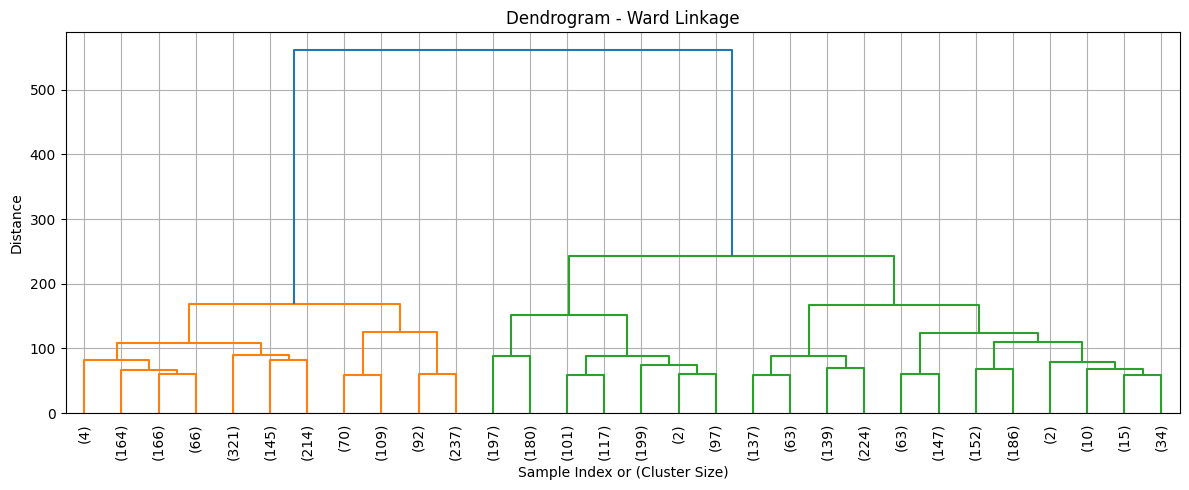

In [21]:
# Perform linkage using 'ward' method
linked_ward = linkage(df_scaled, method='ward')

# Create and save figure
fig = plt.figure(figsize=(12, 5))
dendrogram(linked_ward, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=10.)
plt.title('Dendrogram - Ward Linkage')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.grid(True)
plt.tight_layout()
fig.savefig("dendrogram_ward.png", dpi=300)
plt.show()


# 6. Cluster Comparison and Observations

### The number of clusters is estimated for each linkage method and compared to pleasant weather labels for potential alignment.


In [24]:
# Set a distance threshold for cutting the dendrogram
threshold = 15

# Single Linkage (unscaled)
clusters_single = fcluster(linked_single, t=threshold, criterion='distance')
print(f"🔹 Single Linkage Clusters: {len(np.unique(clusters_single))}")

# Complete Linkage (scaled)
clusters_complete = fcluster(linked_complete, t=threshold, criterion='distance')
print(f"🔹 Complete Linkage Clusters: {len(np.unique(clusters_complete))}")

# Average Linkage (scaled)
clusters_average = fcluster(linked_average, t=threshold, criterion='distance')
print(f"🔹 Average Linkage Clusters: {len(np.unique(clusters_average))}")

# Ward Linkage (scaled)
clusters_ward = fcluster(linked_ward, t=threshold, criterion='distance')
print(f"🔹 Ward Linkage Clusters: {len(np.unique(clusters_ward))}")


🔹 Single Linkage Clusters: 3639
🔹 Complete Linkage Clusters: 259
🔹 Average Linkage Clusters: 72
🔹 Ward Linkage Clusters: 565


# 6. Cluster Comparison and Observations

### The number of clusters is estimated for each linkage method using a distance threshold of 15, and the results are compared for interpretability and alignment with pleasant weather labels.


### Displayed earlier:
### Single Linkage: 3639 clusters
### Complete Linkage: 259 clusters
### Average Linkage: 72 clusters
### Ward Linkage: 565 clusters


# Observations

## Single Linkage resulted in 3,639 clusters, suggesting high fragmentation. This method is known to suffer from the "chaining effect," leading to many small clusters and poor interpretability.

## Complete Linkage produced 259 clusters, more compact and distinct. However, this number may still be too high to relate to meaningful groupings like weather patterns.

## Average Linkage formed 72 clusters, which strikes a better balance — fewer but more meaningful clusters that may align more closely with regional or seasonal patterns.

## Ward Linkage gave 565 clusters, which is more refined than single linkage but still indicates high sensitivity to small variations in data.

# Insight

Among the four methods, Average Linkage showed the most practical cluster count (72), making it a good candidate for comparing against the pleasant/unpleasant weather labels. Single Linkage clearly over-segmented the data and is less reliable for meaningful analysis.

# 7. Conclusion

### The hierarchical clustering analysis revealed that different linkage methods produce widely varying numbers of clusters, with average linkage offering the most interpretable result. Scaled data proved more stable and meaningful for clustering.


Key Takeaways:

Single linkage, while computationally fast, resulted in excessive clusters (3,639), making it unsuitable for practical use.

Complete and Ward linkage produced a moderate-to-high number of clusters (259 and 565), which may require dimensionality reduction for interpretability.

Average linkage gave the most usable result (72 clusters), balancing interpretability with structure.

Scaling the data before clustering greatly improved performance and consistency, especially for average, complete, and ward methods.

These findings will inform the next phase, where PCA will be applied to reduce dimensions and potentially improve clustering alignment with "pleasant weather" labels.